In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate

In [292]:
data = pd.read_csv('data/methlyation_data_335.csv')

In [293]:
data.head()

,Age,cg13319175,cg21211748,cg19420968,cg14992253,cg26372517,cg07388493,cg19044674,cg23786576,cg18983672,cg10266490,cg06836772,cg22901840,cg09118625,cg08413469,cg19514928,cg05675373,cg10045881,cg18031008,cg07337598,cg16168311,cg01459453,cg02275294,cg21870884,cg15262928,cg24450312,cg09885951,cg27202708,cg26043391,cg09809672,cg11314684,cg25657834,cg08030082,cg14424579,cg12351433,cg02154074,cg01968178,cg22809047,cg21378206,cg17099569,cg08251036,cg05847778,cg13038560,cg03947362,cg11388238,cg10376763,cg10523019,cg20795863,cg25781123,cg04005032,...,cg11025793,cg02489552,cg07408456,cg26842024,cg13899108,cg06952310,cg21395782,cg12830694,cg22006386,cg05921699,cg12768605,cg07291563,cg15974053,cg14060828,cg05294243,cg07455279,cg26456957,cg22190114,cg01644850,cg22568540,cg24116886,cg22449114,cg24899750,cg17729667,cg24834740,cg23662675,cg06926735,cg14597908,cg02047577,cg03167275,cg27544190,cg13854874,cg13460409,cg01262913,cg17274064,cg12373771,cg25166896,cg05442902,cg20295671,cg18440048,cg07849904,cg01407797,cg19853760,cg23124451,cg19167673,cg11932564,cg26453588,cg26394940,cg13269407,cg17285325
0,69,0.916345,0.047419,0.935816,0.113106,0.412038,0.416032,0.079910,0.026522,0.901150,0.163207,0.138579,0.646591,0.623324,0.052070,0.104190,0.028001,0.671106,0.042596,0.773710,0.110469,0.643313,0.080197,0.253471,0.034745,0.050867,0.030407,0.301554,0.047390,0.346234,0.411380,0.086520,0.574676,0.021751,0.326438,0.128598,0.085057,0.742130,0.936686,0.777114,0.931195,0.016720,0.920364,0.022197,0.031950,0.804360,0.237106,0.936198,0.060050,0.044821,...,0.049195,0.764209,0.304902,0.126382,0.412099,0.867799,0.048594,0.931606,0.030599,0.858464,0.183847,0.028272,0.021262,0.130464,0.238618,0.178904,0.030740,0.891315,0.035745,0.876472,0.904112,0.400590,0.657433,0.174733,0.047895,0.024090,0.030764,0.484176,0.013422,0.096724,0.095625,0.175141,0.350806,0.050297,0.155979,0.139396,0.029033,0.254772,0.013171,0.194555,0.037849,0.057335,0.582441,0.456778,0.151220,0.020158,0.524586,0.041061,0.066466,0.038373
1,59,0.867874,0.041080,0.889517,0.126839,0.399415,0.370382,0.057310,0.034538,0.890207,0.103545,0.161334,0.548799,0.586013,0.038164,0.071797,0.073880,0.535621,0.039542,0.744249,0.093339,0.578254,0.057741,0.233909,0.022583,0.024664,0.024760,0.284396,0.024457,0.393993,0.299089,0.095346,0.454004,0.022101,0.244054,0.166687,0.098875,0.640307,0.916661,0.736930,0.908107,0.020176,0.897140,0.021226,0.024925,0.903074,0.177539,0.901510,0.028713,0.043671,...,0.047822,0.647667,0.244959,0.118257,0.423003,0.691793,0.060864,0.913485,0.028831,0.831933,0.170440,0.028893,0.053667,0.119264,0.157417,0.173814,0.029106,0.907487,0.027911,0.846726,0.900623,0.341634,0.583590,0.148549,0.026031,0.014623,0.018436,0.392289,0.011405,0.076140,0.085463,0.195543,0.338655,0.055838,0.139947,0.134381,0.048121,0.253442,0.012540,0.131741,0.044876,0.064012,0.501057,0.475220,0.091780,0.014904,0.446309,0.063016,0.105967,0.018717
2,81,0.865747,0.030131,0.906165,0.111694,0.422172,0.335247,0.035479,0.022014,0.897257,0.184002,0.153629,0.821099,0.784080,0.031355,0.045533,0.012938,0.655304,0.026857,0.749158,0.090781,0.700913,0.070649,0.323466,0.024992,0.015211,0.020324,0.316376,0.017196,0.349429,0.286225,0.057778,0.634509,0.010027,0.290273,0.109317,0.107369,0.725888,0.935704,0.626399,0.929041,0.015494,0.886116,0.015911,0.026461,0.892133,0.171827,0.911505,0.037488,0.026532,...,0.055338,0.694199,0.335515,0.073749,0.582612,0.815223,0.022741,0.932722,0.027684,0.846831,0.110952,0.020475,0.018866,0.105692,0.208124,0.128108,0.021852,0.910030,0.030615,0.867335,0.883001,0.396848,0.630216,0.150638,0.017282,0.014047,0.014876,0.447929,0.009922,0.050844,0.083652,0.170714,0.258378,0.043879,0.113223,0.120735,0.037632,0.234571,0.012303,0.244358,0.034590,0.032008,0.529641,0.409944,0.077180,0.015787,0.428903,0.073846,0.092356,0.015911
3,83,0.869889,0.027508,0.918314,0.118929,0.365501,0.396706,0.050128,0.023313,0.912475,0.252652,0.139589,0.728286,0.727977,0.053309,0.077372,0.054583,0.576086,0.030564,0.781708,0.085537,0.688404,0.122872

In [40]:
data.head()

,Age,cg13319175,cg21211748,cg19420968,cg14992253,cg26372517,cg07388493,cg19044674,cg23786576,cg18983672,cg10266490,cg06836772,cg22901840,cg09118625,cg08413469,cg19514928,cg05675373,cg10045881,cg18031008,cg07337598,cg16168311,cg01459453,cg02275294,cg21870884,cg15262928,cg24450312,cg09885951,cg27202708,cg26043391,cg09809672,cg11314684,cg25657834,cg08030082,cg14424579,cg12351433,cg02154074,cg01968178,cg22809047,cg21378206,cg17099569,cg08251036,cg05847778,cg13038560,cg03947362,cg11388238,cg10376763,cg10523019,cg20795863,cg25781123,cg04005032,...,cg11025793,cg02489552,cg07408456,cg26842024,cg13899108,cg06952310,cg21395782,cg12830694,cg22006386,cg05921699,cg12768605,cg07291563,cg15974053,cg14060828,cg05294243,cg07455279,cg26456957,cg22190114,cg01644850,cg22568540,cg24116886,cg22449114,cg24899750,cg17729667,cg24834740,cg23662675,cg06926735,cg14597908,cg02047577,cg03167275,cg27544190,cg13854874,cg13460409,cg01262913,cg17274064,cg12373771,cg25166896,cg05442902,cg20295671,cg18440048,cg07849904,cg01407797,cg19853760,cg23124451,cg19167673,cg11932564,cg26453588,cg26394940,cg13269407,cg17285325
0,69,0.916345,0.047419,0.935816,0.113106,0.412038,0.416032,0.079910,0.026522,0.901150,0.163207,0.138579,0.646591,0.623324,0.052070,0.104190,0.028001,0.671106,0.042596,0.773710,0.110469,0.643313,0.080197,0.253471,0.034745,0.050867,0.030407,0.301554,0.047390,0.346234,0.411380,0.086520,0.574676,0.021751,0.326438,0.128598,0.085057,0.742130,0.936686,0.777114,0.931195,0.016720,0.920364,0.022197,0.031950,0.804360,0.237106,0.936198,0.060050,0.044821,...,0.049195,0.764209,0.304902,0.126382,0.412099,0.867799,0.048594,0.931606,0.030599,0.858464,0.183847,0.028272,0.021262,0.130464,0.238618,0.178904,0.030740,0.891315,0.035745,0.876472,0.904112,0.400590,0.657433,0.174733,0.047895,0.024090,0.030764,0.484176,0.013422,0.096724,0.095625,0.175141,0.350806,0.050297,0.155979,0.139396,0.029033,0.254772,0.013171,0.194555,0.037849,0.057335,0.582441,0.456778,0.151220,0.020158,0.524586,0.041061,0.066466,0.038373
1,59,0.867874,0.041080,0.889517,0.126839,0.399415,0.370382,0.057310,0.034538,0.890207,0.103545,0.161334,0.548799,0.586013,0.038164,0.071797,0.073880,0.535621,0.039542,0.744249,0.093339,0.578254,0.057741,0.233909,0.022583,0.024664,0.024760,0.284396,0.024457,0.393993,0.299089,0.095346,0.454004,0.022101,0.244054,0.166687,0.098875,0.640307,0.916661,0.736930,0.908107,0.020176,0.897140,0.021226,0.024925,0.903074,0.177539,0.901510,0.028713,0.043671,...,0.047822,0.647667,0.244959,0.118257,0.423003,0.691793,0.060864,0.913485,0.028831,0.831933,0.170440,0.028893,0.053667,0.119264,0.157417,0.173814,0.029106,0.907487,0.027911,0.846726,0.900623,0.341634,0.583590,0.148549,0.026031,0.014623,0.018436,0.392289,0.011405,0.076140,0.085463,0.195543,0.338655,0.055838,0.139947,0.134381,0.048121,0.253442,0.012540,0.131741,0.044876,0.064012,0.501057,0.475220,0.091780,0.014904,0.446309,0.063016,0.105967,0.018717
2,81,0.865747,0.030131,0.906165,0.111694,0.422172,0.335247,0.035479,0.022014,0.897257,0.184002,0.153629,0.821099,0.784080,0.031355,0.045533,0.012938,0.655304,0.026857,0.749158,0.090781,0.700913,0.070649,0.323466,0.024992,0.015211,0.020324,0.316376,0.017196,0.349429,0.286225,0.057778,0.634509,0.010027,0.290273,0.109317,0.107369,0.725888,0.935704,0.626399,0.929041,0.015494,0.886116,0.015911,0.026461,0.892133,0.171827,0.911505,0.037488,0.026532,...,0.055338,0.694199,0.335515,0.073749,0.582612,0.815223,0.022741,0.932722,0.027684,0.846831,0.110952,0.020475,0.018866,0.105692,0.208124,0.128108,0.021852,0.910030,0.030615,0.867335,0.883001,0.396848,0.630216,0.150638,0.017282,0.014047,0.014876,0.447929,0.009922,0.050844,0.083652,0.170714,0.258378,0.043879,0.113223,0.120735,0.037632,0.234571,0.012303,0.244358,0.034590,0.032008,0.529641,0.409944,0.077180,0.015787,0.428903,0.073846,0.092356,0.015911
3,83,0.869889,0.027508,0.918314,0.118929,0.365501,0.396706,0.050128,0.023313,0.912475,0.252652,0.139589,0.728286,0.727977,0.053309,0.077372,0.054583,0.576086,0.030564,0.781708,0.085537,0.688404,0.122872

In [294]:
data.shape

(135, 336)

In [295]:
X = data.drop('Age', axis=1)
y = data['Age']

In [296]:
corrs = {}
for col in X.columns:
    corrs[col] = np.corrcoef(X[col], y)[1][0]

In [297]:
X.columns

Index(['cg13319175', 'cg21211748', 'cg19420968', 'cg14992253', 'cg26372517', 'cg07388493', 'cg19044674', 'cg23786576', 'cg18983672', 'cg10266490',
       ...
       'cg07849904', 'cg01407797', 'cg19853760', 'cg23124451', 'cg19167673', 'cg11932564', 'cg26453588', 'cg26394940', 'cg13269407', 'cg17285325'], dtype='object', length=335)

In [298]:
sortedcorrs = dict(sorted(corrs.items(), key=lambda item: np.abs(item[1]), reverse=True))

In [299]:
sortedcorrs

{'cg01820374': -0.5211288049740527,
 'cg22736354': 0.48764251421574856,
 'cg23124451': -0.4815537477989492,
 'cg19722847': -0.46086023676995924,
 'cg15804973': -0.44913405332959183,
 'cg09809672': -0.44001476318397514,
 'cg06493994': 0.43915916538154215,
 'cg22947000': -0.42097431493397913,
 'cg21801378': 0.4161301143977576,
 'cg19761273': -0.413794315650845,
 'cg02071305': -0.4097169396407883,
 'cg22809047': 0.4022620703639773,
 'cg04474832': -0.3996998887066997,
 'cg05442902': -0.3966460423519525,
 'cg01459453': -0.3853096766551719,
 'cg13547237': -0.3827328686679889,
 'cg00168942': -0.37255094694026963,
 'cg12373771': 0.3723626157862334,
 'cg11299964': -0.3650236752451211,
 'cg13931228': -0.36084359862470766,
 'cg20240860': -0.353908879283687,
 'cg24058132': -0.34899090139247513,
 'cg26614073': -0.3485706508284622,
 'cg27015931': -0.339309149331255,
 'cg05675373': 0.32851685173544665,
 'cg16744741': -0.32766750407025497,
 'cg25148589': 0.32722374754163036,
 'cg19853760': -0.31957671

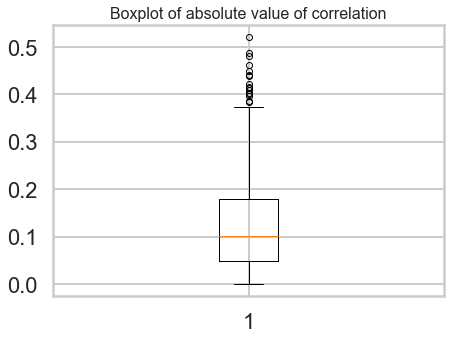

In [300]:
fig = plt.figure(figsize=(7,5))
plt.boxplot(np.abs(list(sortedcorrs.values())))
plt.title('Boxplot of absolute value of correlation', fontsize=16)
plt.show()

In [301]:
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [304]:
top9corrs = take(9, sortedcorrs.items())

In [305]:
top9corrs

[('cg01820374', -0.5211288049740527),
 ('cg22736354', 0.48764251421574856),
 ('cg23124451', -0.4815537477989492),
 ('cg19722847', -0.46086023676995924),
 ('cg15804973', -0.44913405332959183),
 ('cg09809672', -0.44001476318397514),
 ('cg06493994', 0.43915916538154215),
 ('cg22947000', -0.42097431493397913),
 ('cg21801378', 0.4161301143977576)]

[]

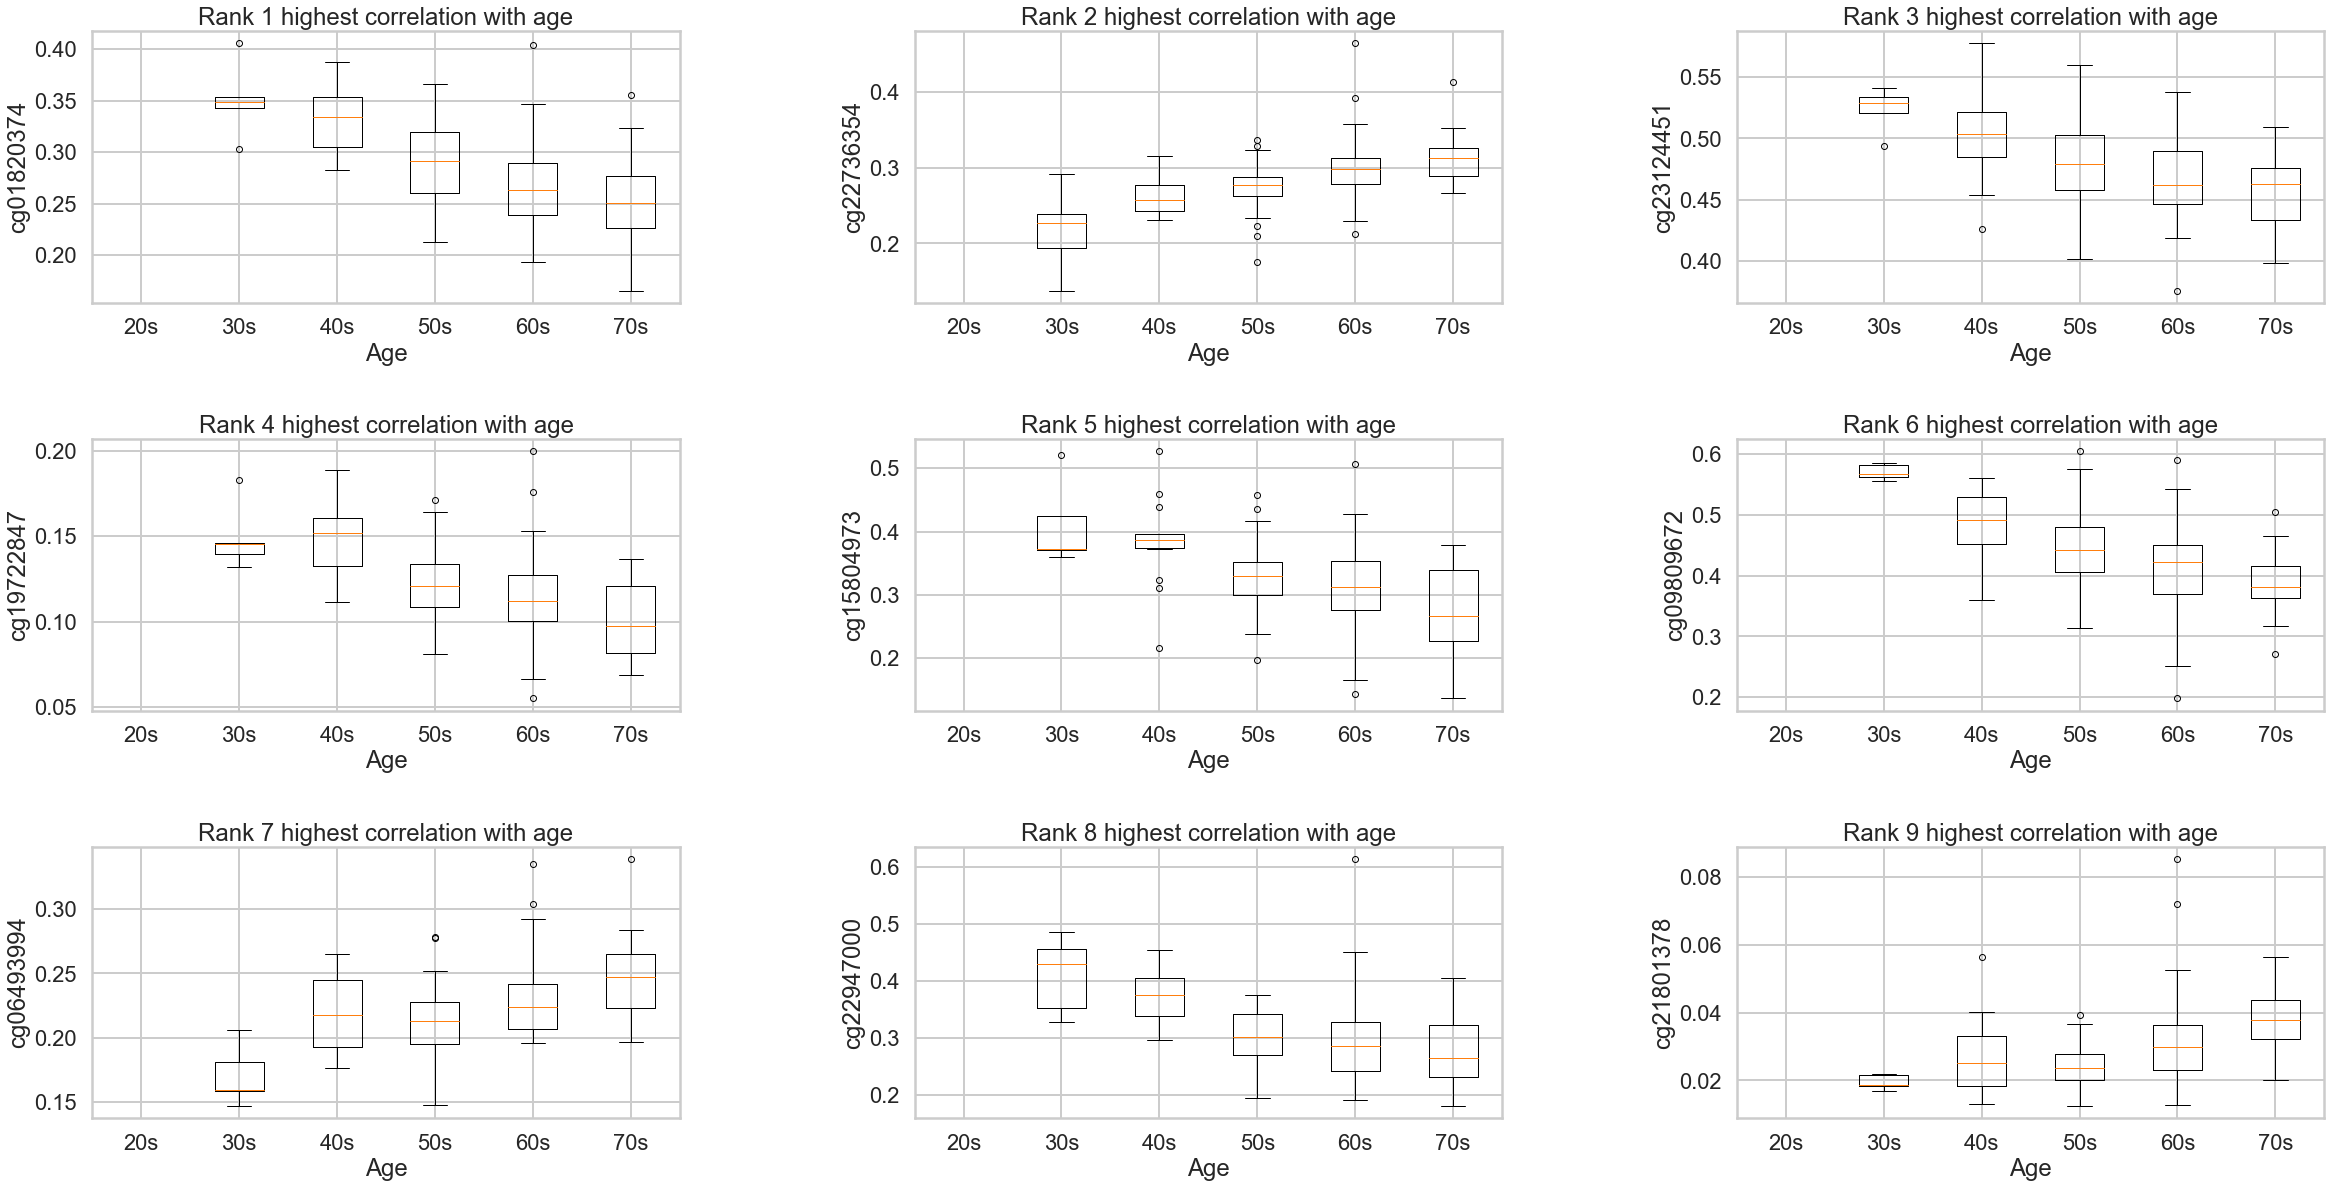

In [307]:
nums = [20, 30, 40, 50, 60, 70]
fig, axs = plt.subplots(3,3, figsize=(40, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.4)
axs = axs.ravel()
i=0

for feature in top9corrs:
    features = []
    for n in nums:
        temp = data[(data['Age']>=n) & (data['Age']<n+10)][feature[0]]
        features.append(temp)
    axs[i].boxplot(features)
    axs[i].set_xticks(1+np.arange(len(nums)))
    axs[i].set_xticklabels([num + 's' for num in map(str, nums)])
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel(feature[0])
    axs[i].set_title('Rank ' + str(i+1) + ' highest correlation with age')
    i=i+1
plt.plot()

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=111)
print(X_train.shape)
print(X_test.shape)

(114, 335)
(21, 335)


In [310]:
linreg = LinearRegression().fit(X_train, y_train)
testpreds = linreg.predict(X_test)
trainpreds = linreg.predict(X_train)

In [311]:
trainmse = mean_squared_error(y_train, trainpreds)
testmse = mean_squared_error(y_test, testpreds)
trainr2 = r2_score(y_train, trainpreds)
testr2 = r2_score(y_test, testpreds)

In [312]:
print('Train MSE: ' + str(trainmse))
print('Test MSE: ' + str(testmse))
print('Train r^2: ' + str(trainr2))
print('Test r^2: ' + str(testr2))

Train MSE: 5.5411804329124486e-27
Test MSE: 66.28751716373206
Train r^2: 1.0
Test r^2: 0.1736545943802058


In [313]:
pca = PCA().fit(X)

In [314]:
pcaX = pca.transform(X)

In [315]:
pca_df = pd.DataFrame(pcaX)

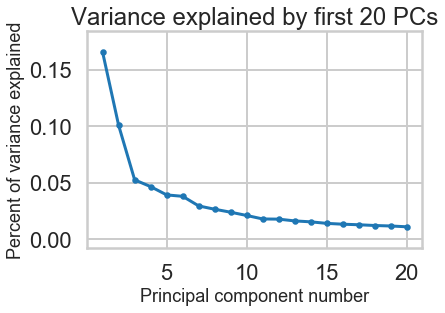

In [317]:
plt.scatter(np.arange(1, 21), pca.explained_variance_ratio_[0:20], s=20)
plt.plot(np.arange(1, 21), pca.explained_variance_ratio_[0:20])
plt.xlabel('Principal component number', fontsize=18)
plt.ylabel('Percent of variance explained', fontsize=18)
plt.title('Variance explained by first 20 PCs')
plt.show()

In [318]:
sum(pca.explained_variance_ratio_[0:7])

0.4729426668077948

In [319]:
newpcadf = pca_df.iloc[:, 0:7]
X_train, X_test, y_train, y_test = train_test_split(newpcadf, y, test_size=0.15, random_state=111)

In [320]:
linregpca = LinearRegression().fit(X_train, y_train)
testpreds = linregpca.predict(X_test)
trainpreds = linregpca.predict(X_train)

In [321]:
trainmse = mean_squared_error(y_train, trainpreds)
testmse = mean_squared_error(y_test, testpreds)
trainr2 = r2_score(y_train, trainpreds)
testr2 = r2_score(y_test, testpreds)

In [322]:
print('Train MSE: ' + str(trainmse))
print('Test MSE: ' + str(testmse))
print('Train r^2: ' + str(trainr2))
print('Test r^2: ' + str(testr2))

Train MSE: 73.96400487585795
Test MSE: 45.57224182366763
Train r^2: 0.5299063528882136
Test r^2: 0.43189284700821395


In [323]:
cvs = cross_validate(linregpca, newpcadf, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

In [324]:
cvs

{'fit_time': array([0.00195312, 0.00299096, 0.00299287, 0.00299168, 0.00398803]),
 'score_time': array([0.00199533, 0.00199652, 0.0020349 , 0.00199556, 0.00199485]),
 'test_r2': array([-0.75812388,  0.08069901,  0.6035098 ,  0.72008465,  0.47127988]),
 'train_r2': array([0.48491266, 0.69011935, 0.50097329, 0.48347877, 0.52460435]),
 'test_neg_mean_squared_error': array([-295.79891641, -185.31292021,  -50.7801157 ,  -34.04216107,
         -48.56972427]),
 'train_neg_mean_squared_error': array([-72.19648502, -40.71750456, -73.90331455, -78.14491506,
        -74.57141582])}

In [325]:
print('Train MSEs: ' + str(-1 * cvs['train_neg_mean_squared_error']))
print('Test MSEs: ' + str(-1 * cvs['test_neg_mean_squared_error']))
print('Train r^2s: ' + str(cvs['train_r2']))
print('Test r^2s: ' + str(cvs['test_r2']))

Train MSEs: [72.19648502 40.71750456 73.90331455 78.14491506 74.57141582]
Test MSEs: [295.79891641 185.31292021  50.7801157   34.04216107  48.56972427]
Train r^2s: [0.48491266 0.69011935 0.50097329 0.48347877 0.52460435]
Test r^2s: [-0.75812388  0.08069901  0.6035098   0.72008465  0.47127988]
